# Itroducción a Redes Bayesianas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/1/18/Bayes%27_Theorem_MMB_01.jpg" width="400px" height="300px" />

> Con el aprendizaje del módulo 1 en cuanto a modelos probabilísticis, estamos listos para introducir el componente gráfico y darle total sentido al nombre del curso: **Modelos gráficos probabilísticos**. Esta clase revisaremos un par de conceptos matemáticos preeliminares, y finalmente veremos los fundamentos de uno de los dos modelos probabilísticos que estudiaremos: las **Redes Bayesianas**.

> **Objetivos:**
> - Aprender qué es una red Bayesiana y cómo se factorizan distribuciones sobre ellas.

> **Referencias:**
> 
> - Probabilistic Graphical Models: Principles and Techniques, By Daphne Koller and Nir Friedman. Cap. 3.
> - Bayesian Reasoning and Machine Learning, By David Barber. Cap. 3.


<p style="text-align:right;"> Imagen recuperada de: https://upload.wikimedia.org/wikipedia/commons/1/18/Bayes%27_Theorem_MMB_01.jpg.</p>

___

# 0. Recorderis

Comencemos por darle un significado al nombre **Modelos Gráficos Probabilísticos**;

- Modelo: construimos un modelo a partir de la experiencia de un experto y de los datos para modelar la situación que estamos enfrentando. El modelo es un ente por sí solo, y contiene todo nuestro conocimiento acerca del fenómeno sobre el que estamos razonando: las variables que involucra y cómo interactúan entre ellas. Entonces separamos el modelo de los algoritmos que usamos para razonar sobre él.

- Probabilísitico: hablamos que casi todas las aplicaciones reales tenían algún tipo de incertidumbre involucrada (observación parcial, ruido de medición, incluso dudamos de que el mundo sea determinista). Por tanto, la probabildiad es un enfoque que nos permite incorporar esta incertidumbre dentro del modelo y nos da herramientas para trabajar con la incertidumbre.

- Gráfico: finalmente, discutimos que codificar una distribución conjunta es una tarea compleja. En el caso más sencillo en el que tenemos $k$ VA binarias, necesitaríamos $2^k$ parámetros para especificar completamente la distribución conjunta. Por tanto, explotamos la teoría de grafos para codificar y manipular este tipo de distribuciones de manera efectiva.

Concluimos entonces que el uso de las representaciones gráficas está justificado por:

- Son una estructura de datos intuitiva y compacta para capturar las distribuciones de alta dimensionalidad.

- Nos permiten razonar de forma eficiente usando algoritmos que explotan la estructura gráfica.

- En ciertas ocasiones, tenemos una parametrización "*sparse*", lo que nos permite representar distribuciones grandes con un número pequeño de parámetros.

- Podemos adquirir conocimiento de expertos.

- Nos permite aprender los parámetros de manera robusta a partir de datos.

# 1. Preeliminares

## 1.1. Ejemplo

Consideramos el caso de un estudiante dentro de un curso. Queremos razonar acerca de 
   - la $I$(nteligencia) del estudiante,
   - la $D$(ificultad) del curso,
   - la $C$(alificación) del estudiante dentro del curso,
   - el $P$(untaje) en las pruebas estatales, y
   - una carta de $R$(ecomendación) laboral que emite el profesor del curso acerca del estudiante.

Consideramos una discretización de las anteriores variables como sigue:
- $\mathrm{Val}(I)=\{i^0, i^1\}$, donde $i^0$ representa baja inteligencia e $i^1$ representa alta inteligencia;
- $\mathrm{Val}(D)=\{d^0, d^1\}$, donde $d^0$ representa fácil y $d^1$ representa difícil;
- $\mathrm{Val}(C)=\{c^0, c^1, c^2\}$, donde $c^0$ representa calificación baja ($< 6$), $c^1$ representa calificación media ($\geq 6$, $< 9$) y $c^2$ representa calificación alta ($\geq 9$);
- $\mathrm{Val}(P)=\{p^0, p^1\}$, donde $p^0$ representa mal puntaje y $p^1$ representa alto puntaje;
- $\mathrm{Val}(R)=\{r^0, r^1\}$, donde $r^0$ representa una carta de recomendación débil y $r^1$ representa una carta de recomendación fuerte.

**Pregunta.** De no usar modelos gráficos probabilísticos, ¿cuántos parámetros necesitamos para especificar por completo la distribución sobre las cinco variables mencionadas?


*Respuesta:* Necesitaríamos $2 \times 2 \times 3 \times 2 \times 2 -1 = 48 - 1 = 47$ parámetros.



Por otra parte, pensando en la **causalidad** de la situación, podríamos plantear la siguiente Red Bayesiana para modelar el ejemplo anterior:

In [1]:
from IPython.display import Image

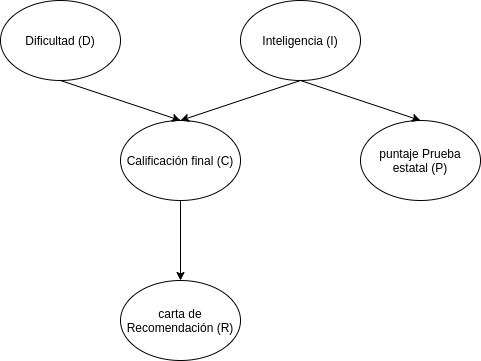

In [2]:
Image(filename='figures/Student.png')

Al final de esta clase, entenderemos cómo codificar la distribución de las variables sobre esta red, y apartir de ello, porqué este modelo necesita muchos menos parámetros que el modelo genérico (distribución conjunta).

## 1.2. Distribuciones de probabilidad y sus operaciones

Consideremos el ejemplo del estudiante, esta vez reducido a las variables $I$, $D$ y $C$.

Una distribución conjunta, $P(I,D,C)$, sobre estas tres variables es:

|  $I$  |  $D$  |  $C$  |  $P$  |
| ----- | ----- | ----- | ----- |
| $i^0$ | $d^0$ | $c^0$ | 0.126 |
| $i^0$ | $d^0$ | $c^1$ | 0.168 |
| $i^0$ | $d^0$ | $c^2$ | 0.126 |
| $i^0$ | $d^1$ | $c^0$ | 0.126 |
| $i^0$ | $d^1$ | $c^1$ | 0.045 |
| $i^0$ | $d^1$ | $c^2$ | 0.009 |
| $i^1$ | $d^0$ | $c^0$ | 0.0056|
| $i^1$ | $d^0$ | $c^1$ | 0.0224|
| $i^1$ | $d^0$ | $c^2$ | 0.252 |
| $i^1$ | $d^1$ | $c^0$ | 0.024 |
| $i^1$ | $d^1$ | $c^1$ | 0.036 |
| $i^1$ | $d^1$ | $c^2$ | 0.06  |

**Pregunta.** ¿Cuántos parámetros en total?


*Respuesta:* $2 \times 2 \times 3 = 12$



In [3]:
# Importamos pgmpy.factors.discrete.JointProbabilityDistribution
from pgmpy.factors.discrete import JointProbabilityDistribution

In [4]:
# help JointProbabilityDistribution
JointProbabilityDistribution?

In [9]:
# Crear la distribución conjunta
joint = JointProbabilityDistribution(
    variables=["I", "D", "C"],
    cardinality=[2, 2, 3],
    values=[.126, .168, .126, .126, .045, .009, .0056, .0224, .252, .024, .036, 0.06]
)

In [10]:
# Verificar que la distribución es válida
joint.values.sum()

1.0

Entonces, tenemos que para cualquier distribución sobre un conjunto de variables $\bar{X}$:

$$\sum_{\bar{x}\in\mathrm{Val}(\bar{X})} P(\bar{X}=\bar{x}) = 1.$$

> **Independencia de parámetros:** son parámetros independientes aquellos cuyo valor no está completamente determinado por el valor de otros parámetros.

En este caso, la distribución se determina con 12 parámetros. Sin embargo, la suma de todos ellos debe ser uno (1). Por tanto, *sólo hay 11 parámetros independientes*.

### ¿Qué operaciones podemos llevar a cabo sobre una distribucción?

**1. Reducción**

Supongamos que observamos que la calificación final del estudiante es alta, esto es, $C=c^2$. La operación de *reducción* consiste en eliminar todas las filas que no son consistentes con la observación:

In [11]:
# help método reduce
joint.reduce?

In [13]:
# Operación de reducción C=c2
p_IDc2 = joint.reduce(values=[("C", 2)], inplace=False)

In [14]:
print(p_IDc2)

+------+------+----------+
| I    | D    |   P(I,D) |
+======+======+==========+
| I(0) | D(0) |   0.1260 |
+------+------+----------+
| I(0) | D(1) |   0.0090 |
+------+------+----------+
| I(1) | D(0) |   0.2520 |
+------+------+----------+
| I(1) | D(1) |   0.0600 |
+------+------+----------+


In [15]:
p_IDc2.values.sum()

0.447

Matemáticamente, esta operación equivale a considerar la distribución evaluada $P(I, D, C=c^2) = P(I, D, c^2)$.

**Pregunta**. ¿Es este resultado una distribución de probabilidad sobre las variables $I,D$?


*Respuesta:* No.



**2. Condición**

A partir de la operación de reducción, si queremos obtener una distribución legítima sobre las variables que no reducimos, debemos dividir sobre la suma:

In [16]:
# help método conditional_distribution
joint.conditional_distribution?

In [17]:
# Operación de condición sobre C=c2
p_ID_given_c2 = joint.conditional_distribution(values=[("C", 2)], inplace=False)

In [18]:
print(p_ID_given_c2)

+------+------+----------+
| I    | D    |   P(I,D) |
+======+======+==========+
| I(0) | D(0) |   0.2819 |
+------+------+----------+
| I(0) | D(1) |   0.0201 |
+------+------+----------+
| I(1) | D(0) |   0.5638 |
+------+------+----------+
| I(1) | D(1) |   0.1342 |
+------+------+----------+


In [19]:
p_ID_given_c2.values.sum()

1.0

In [20]:
p_IDc2.values / p_IDc2.values.sum()

array([[0.28187919, 0.02013423],
       [0.56375839, 0.13422819]])

Matemáticamente, esta operación equivale a considerar la distribución condicionada $P(I, D| C=c^2) = P(I, D| c^2)$.

**Pregunta**. ¿Es este resultado una distribución de probabilidad sobre las variables $I,D$?

*Respuesta:* Si.

**3. Marginalización**

Cuando tenemos una distribución de probabilidad sobre un conjunto de variables, y producimos una sobre un subconjunto de las variables originales. Por ejemplo, queremos la distribución marginal sobre $I, D$:

In [21]:
# Imprimir distribución inicial
print(joint)

+------+------+------+------------+
| I    | D    | C    |   P(I,D,C) |
+======+======+======+============+
| I(0) | D(0) | C(0) |     0.1260 |
+------+------+------+------------+
| I(0) | D(0) | C(1) |     0.1680 |
+------+------+------+------------+
| I(0) | D(0) | C(2) |     0.1260 |
+------+------+------+------------+
| I(0) | D(1) | C(0) |     0.1260 |
+------+------+------+------------+
| I(0) | D(1) | C(1) |     0.0450 |
+------+------+------+------------+
| I(0) | D(1) | C(2) |     0.0090 |
+------+------+------+------------+
| I(1) | D(0) | C(0) |     0.0056 |
+------+------+------+------------+
| I(1) | D(0) | C(1) |     0.0224 |
+------+------+------+------------+
| I(1) | D(0) | C(2) |     0.2520 |
+------+------+------+------------+
| I(1) | D(1) | C(0) |     0.0240 |
+------+------+------+------------+
| I(1) | D(1) | C(1) |     0.0360 |
+------+------+------+------------+
| I(1) | D(1) | C(2) |     0.0600 |
+------+------+------+------------+


In [22]:
# Marginalizar I, D
p_C = joint.marginalize(variables=["I", "D"], inplace=False)

In [23]:
print(p_C)

+------+--------+
| C    |   P(C) |
+======+========+
| C(0) | 0.2816 |
+------+--------+
| C(1) | 0.2714 |
+------+--------+
| C(2) | 0.4470 |
+------+--------+


Y si queremos la marginal sobre $I$ nada más:

In [24]:
# Marginalizar C y D
p_I = joint.marginalize(variables=["C", "D"], inplace=False)

In [25]:
print(p_I)

+------+--------+
| I    |   P(I) |
+======+========+
| I(0) | 0.6000 |
+------+--------+
| I(1) | 0.4000 |
+------+--------+


Matemáticamente, las anteriores operaciones equivalen a:

$$P(I, D) = \sum_{c\in\mathrm{Val}(C)} P(I, D, C=c), \text{ y }$$

$$P(I) = \sum_{(c,d)\in\mathrm{Val}(C,D)} P(I, D=d, C=c).$$

En abuso de la notación, para no hacer engorrosa la escritura, las anteriores sumas se expresan comúnmente como:

$$P(I, D) = \sum_{C} P(I, D, C), \text{ y }$$

$$P(I) = \sum_{C,D} P(I, D, C).$$

___
# 2. Fundamentos de Redes Bayesianas

## 2.1. Modelando independencias.

Consideremos, de nuevo, el ejemplo del estudiante <font color=green> Ver en el tablero y discutir modelamiento a partir de las variables </font>

Ahora, con las distribuciones condiconales:

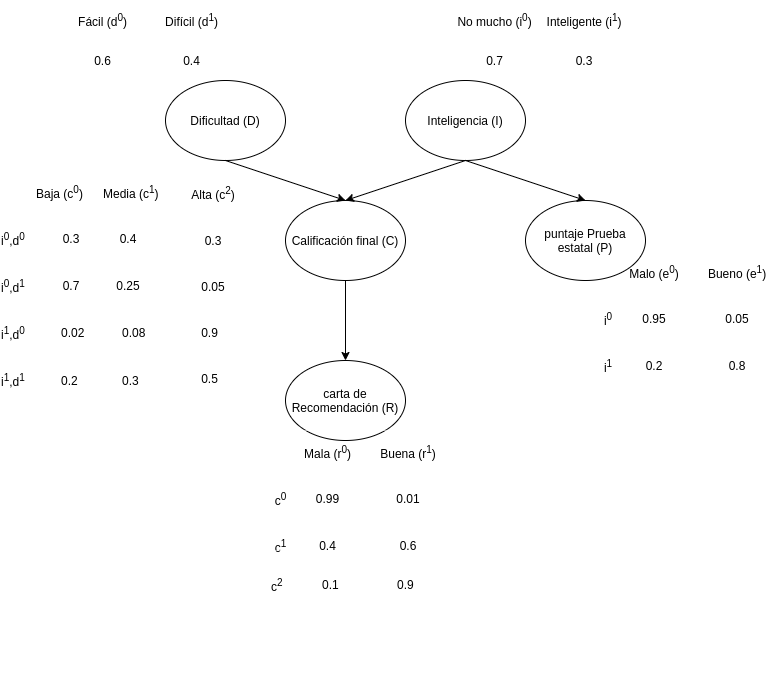

In [26]:
Image(filename='figures/Student1.png')

- Como vimos antes, este modelo se produjo pensando en las dependencias de las VA.

- Se modela cada nodo con una distribución condicional.

Cuando todas las distribuciones condicionales están especificadas, tenemos una red Bayesiana completamente parametrizada, capaz de producir una distribución conjunta sobre todas las VA.

¿Cómo? Regla de la cadena + independencia. <font color=green> Ver en el tablero </font> <font color=red> Descubrir deducción </font>

\begin{align}
P(I, D, C, P, R) & = P(I, D, C, P) P(R | I, D, C, P) \\
                 & = P(I, D, C) P(P | I, D, C) P(R | C) \\
                 & = P(I, D) P(C | I, D) P(P | I) P(R | C) \\
                 & = P(I) P(D | I) P(C | I, D) P(P | I) P(R | C) \\
                 & = P(I) P(D) P(C | I, D) P(P | I) P(R | C) \\
\end{align}


Por ejemplo,

$$P(i^1, d^0, c^0, p^1, r^1)=P(i^1) P(d^0) P(c^0 | i^1, d^0) P(p^1 | i^1) P(r^1 | c^0) = 0.3 \times 0.6 \times 0.02 \times 0.8 \times 0.01 $$

Una forma muy conveniente de definir modelos probabilísticos es a través de las llamadas **Redes Bayesianas**.

> *Definición.* Una **Red Bayesiana** es un grafo (acíclico) dirigido $\mathcal{G}$ donde los nodos representan variables aleatorias (anotados por una distribución condicional de la forma $P(X_i | \mathrm{Pa}_{\mathcal{G}}X_i)$) y los arcos representan impacto directo de una variable sobre otra, y cuya distribución está dada por:
> 
> $$P(X_1, \dots, X_n) = \prod_{i=1}^{n} P(X_i | \mathrm{Pa}_{\mathcal{G}}X_i),$$
>
> donde $\mathrm{Pa}_{\mathcal{G}}X_i$ los nodos padres de $X_i$ en $\mathcal{G}$, y $\mathrm{NoDescendientes}_{\mathcal{G}}X_i$. Entonces, la red Bayesiana $\mathcal{G}$ codifica el siguiente conjunto de **independencias locales**
>
> $$\mathcal{I}_{l}(\mathcal{G}) = \{(X_i \perp \mathrm{NoDescendientes}_{\mathcal{G}}X_i | \mathrm{Pa}_{\mathcal{G}}X_i)\}.$$

**Actividad.**

1. Obtener las independencias locales que codifica la red Bayesiana del estudiante.

2. Comparar el número de parámetros independientes que necesita la red Bayesiana del estudiante contra el número de parámetros que necesitaría la distribución conjunta sin ninguna suposición de independencia.

**¿Cómo declarar una red Bayesiana en pgmpy?**

In [1]:
# Importamos pgmpy.models.BayesianModel
from pgmpy.models import BayesianModel
# Importamos pgmpy.factors.discrete.TabularCPD
from pgmpy.factors.discrete import TabularCPD

In [2]:
BayesianModel?

In [3]:
# Definimos el esqueleto de la red mediante los arcos
student_model = BayesianModel([
    ('D', 'C'),
    ('I', 'C'),
    ('I', 'E'),
    ('C', 'R')
])

In [6]:
TabularCPD?

In [10]:
# Definimos distribución condicional de D
cpd_D = TabularCPD(
    variable='D',
    variable_card=2,
    values=[[0.6],
            [0.4]]
)
# Definimos distribución condicional de I
cpd_I = TabularCPD(
    variable='I',
    variable_card=2,
    values=[[0.7],
            [0.3]]
)

La representación de las distribuciones condicionales en `pgmpy` es un poquito distinto a como está en el dibujo de arriba. En `pgmpy` las columnas representan evidencia, y las filas los distintos estados de la variable en la distribución condicional:

|         | $i^0 d^0$ | $i^0 d^1$ | $i^1 d^0$ | $i^1 d^1$ |
| ------- | --------- | --------- | --------- | --------- |
| $c^0$   | 0.3       | 0.7       | 0.02      | 0.2       |
| $c^1$   | 0.4       | 0.25      | 0.08      | 0.3       |
| $c^2$   | 0.3       | 0.05      | 0.9       | 0.5       |

In [42]:
# Definimos distribución condicional de C
cpd_C = TabularCPD(
    variable='C',
    variable_card=3,
    evidence=['I', 'D'],
    evidence_card=[2, 2],
    values=[[0.3, 0.70, 0.02, 0.2],
            [0.4, 0.25, 0.08, 0.3],
            [0.3, 0.05, 0.90, 0.5]]
)
# Definimos distribución condicional de P
cpd_E = TabularCPD(
    variable='E',
    variable_card=2,
    evidence=['I'],
    evidence_card=[2],
    values=[[0.95, 0.2],
            [0.05, 0.8]]
)
# Definimos distribución condicional de R
cpd_R = TabularCPD(
    variable='R',
    variable_card=2,
    evidence=['C'],
    evidence_card=[3],
    values=[[0.99, 0.4, 0.1],
            [0.01, 0.6, 0.9]]
)

In [39]:
student_model.add_cpds?

In [43]:
# Asociamos las distribuciones condicionales a la red
student_model.add_cpds(
    cpd_D,
    cpd_I,
    cpd_C,
    cpd_E,
    cpd_R
)

In [44]:
# Check the model for various errors. This method checks for the following errors:  
# * Checks if the sum of the probabilities for each state is equal to 1 (tol=0.01).
# * Checks if the CPDs associated with nodes are consistent with their parents.
student_model.check_model()

True

Una vez tenemos el modelo, podemos hacer varias cosas con él. Entre ellas, podemos verificar las independencias locales que codifica el modelo:

In [45]:
# Verificar las independencias locales que implica el modelo
student_model.local_independencies(['I'])

(I ⟂ D)

In [46]:
student_model.local_independencies([
    'I',
    'D',
    'C',
    'E',
    'R'
])

(I ⟂ D)
(D ⟂ E, I)
(C ⟂ E | I, D)
(E ⟂ R, C, D | I)
(R ⟂ E, I, D | C)

## 2.2. Patrones de razonamiento e inferencia

Teniendo una situación modelada con una red Bayesiana, nos podemos plantear tres tipos básicos de razonamientos que poríamos querer resolver:

**1. Razonamiento causal**

Se refiere a cuando tenemos evidencia de causas y queremos razonar acerca de efectos

In [48]:
from IPython.display import Image

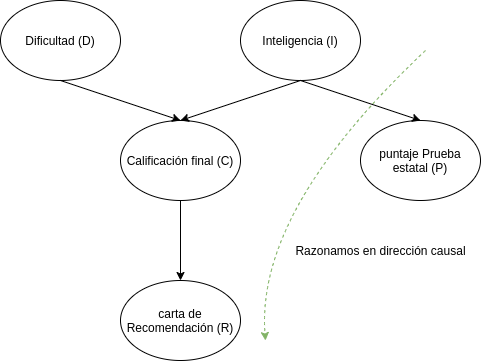

In [49]:
Image(filename='figures/Student2.png')

Por ejemplo, la probabilidad de obtener una buena carta de recomendación es:

$$P(r^1) = \sum_{D,I,C,P} P(D,I,C,P,r^1) \approx 0.5.$$

In [51]:
joint = (cpd_D.to_factor()
         * cpd_I.to_factor()
         * cpd_C.to_factor()
         * cpd_E.to_factor()
         * cpd_R.to_factor())

In [52]:
print(joint.marginalize(variables=['I', 'D', 'C', 'E'],
                        inplace=False))

+------+----------+
| R    |   phi(R) |
+======+==========+
| R(0) |   0.4977 |
+------+----------+
| R(1) |   0.5023 |
+------+----------+


Sin embargo, podemos evaluar cómo esta probabilidad cambia si la condicionamos sobre la inteligencia. Por ejemplo, si el estudiante no es muy inteligente

$$P(r^1 | i^0) = \frac{P(r^1, i^0)}{P(i^0)} = \frac{\sum_{D,C,P} P(D, i^0, C, P, r^1)}{\sum_{D,C,P,R} P(D, i^0, C, P, R)} \approx 0.39.$$

*¿Se esperaba esto o no?*

In [53]:
p_IR = joint.marginalize(variables=['D', 'C', 'E'],
                         inplace=False)

In [55]:
p_Ri0 = p_IR.reduce(values=[('I', 0)], inplace=False)
print(p_Ri0)

+------+----------+
| R    |   phi(R) |
+======+==========+
| R(0) |   0.4280 |
+------+----------+
| R(1) |   0.2720 |
+------+----------+


In [56]:
p_Ri0.values / p_Ri0.values.sum() 

array([0.6114, 0.3886])

Por otra parte, si también condicionamos sobre la dificultad

$$P(r^1 | i^0, d^0) = \frac{P(r^1, i^0, d^0)}{P(i^0, d^0)} = \frac{\sum_{C,P} P(d^0, i^0, C, P, r^1)}{\sum_{C,P,R} P(d^0, i^0, C, P, R)} \approx 0.51.$$

*¿Se esperaba esto o no?*

In [59]:
# Verificar con pgmpy
p_IDR = joint.marginalize(variables=['C', 'E'],
                          inplace=False)

In [60]:
p_Ri0d0 = p_IDR.reduce(values=[('I', 0),
                               ('D', 0)],
                       inplace=False)

In [61]:
print(p_Ri0d0)

+------+----------+
| R    |   phi(R) |
+======+==========+
| R(0) |   0.2045 |
+------+----------+
| R(1) |   0.2155 |
+------+----------+


In [62]:
p_Ri0d0.values / p_Ri0d0.values.sum()

array([0.487, 0.513])

**2. Razonamiento evidencial**

Se refiere a cuando tenemos evidencia de los efectos y que remos razonar acerca de las causas

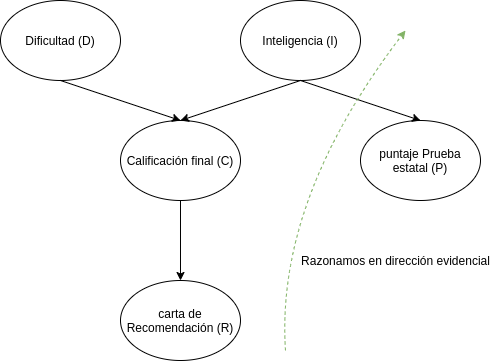

In [63]:
Image(filename='figures/Student3.png')

Por ejemplo, la probabilidad de que el curso sea difícil es:

$$P(d^1) = 0.4.$$

Condicionando sobre la calificación:

$$P(d^1 | c^0) = \frac{P(d^1, c^0)}{P(c^0)} = \frac{\sum_{I,P,R} P(d^1, I, c^0, P, R)}{\sum_{D,I,P,R} P(D, I, c^0, P, R)} \approx 0.63.$$

Similarmente, la probabilidad de que el estudiante sea inteligente es:

$$P(i^1) = 0.3.$$

Condicionando sobre la calificación:

$$P(i^1 | c^0) = \frac{P(i^1, c^0)}{P(c^0)} = \frac{\sum_{D,P,R} P(D, i^1, c^0, P, R)}{\sum_{D,I,P,R} P(D, I, c^0, P, R)} \approx 0.08.$$

In [64]:
# Verificar con pgmpy
print(joint)

+------+------+------+------+------+------------------+
| D    | I    | C    | E    | R    |   phi(D,I,C,E,R) |
+======+======+======+======+======+==================+
| D(0) | I(0) | C(0) | E(0) | R(0) |           0.1185 |
+------+------+------+------+------+------------------+
| D(0) | I(0) | C(0) | E(0) | R(1) |           0.0012 |
+------+------+------+------+------+------------------+
| D(0) | I(0) | C(0) | E(1) | R(0) |           0.0062 |
+------+------+------+------+------+------------------+
| D(0) | I(0) | C(0) | E(1) | R(1) |           0.0001 |
+------+------+------+------+------+------------------+
| D(0) | I(0) | C(1) | E(0) | R(0) |           0.0638 |
+------+------+------+------+------+------------------+
| D(0) | I(0) | C(1) | E(0) | R(1) |           0.0958 |
+------+------+------+------+------+------------------+
| D(0) | I(0) | C(1) | E(1) | R(0) |           0.0034 |
+------+------+------+------+------+------------------+
| D(0) | I(0) | C(1) | E(1) | R(1) |           0

In [65]:
p_DC = joint.marginalize(variables=["I", 'E', 'R'],
                         inplace=False)

In [66]:
p_Dc0 = p_DC.reduce(values=[('C', 0)],
                    inplace=False)

In [67]:
print(p_Dc0)

+------+----------+
| D    |   phi(D) |
+======+==========+
| D(0) |   0.1296 |
+------+----------+
| D(1) |   0.2200 |
+------+----------+


In [68]:
p_Dc0.values / p_Dc0.values.sum()

array([0.37070938, 0.62929062])

**3. Razonamiento intercausal**

Se refiere a cuando hay flujo de información entre dos causas de un mismo efecto (por ejemplo, Dificultad e Inteligencia son causas de la Calificación).

¿Cómo es posible esto si dijimos que $(D\perp I)$? Veremos que en este caso cuando tenemos información de la causa, se produce este efecto.

De nuevo, la probabilidad de que el estudiante sea inteligente es:

$$P(i^1) = 0.3.$$

Condicionando sobre la calificación:

$$P(i^1 | c^0) = \frac{P(i^1, c^0)}{P(c^0)} \approx 0.08.$$

Aún más, si condicionamos sobre la dificultad:

$$P(i^1 | c^0, d^1) = \frac{P(i^1, c^0, d^1)}{P(c^0, d^1)} \approx 0.11.$$

Este tipo de razonamiento es un poco complejo de comprender, pues no tenemos relación directa (un arco en la red) entre $I$, y $D$. 

In [69]:
# Verificar con pgmpy
print(cpd_I)

+------+-----+
| I(0) | 0.7 |
+------+-----+
| I(1) | 0.3 |
+------+-----+


In [70]:
p_IC = joint.marginalize(variables=['D', 'E', 'R'],
                         inplace=False)

In [71]:
p_Ic0 = p_IC.reduce(values=[('C', 0)], inplace=False)
p_Ic0.values / p_Ic0.values.sum()

array([0.92105263, 0.07894737])

In [72]:
p_IDC = joint.marginalize(variables=['E', 'R'],
                          inplace=False)

In [74]:
p_Ic0d1 = p_IDC.reduce(values=[('C', 0), 
                               ('D', 1)], inplace=False)
p_Ic0d1.values / p_Ic0d1.values.sum()

array([0.89090909, 0.10909091])

### Ejemplo 

Un caso que ya estamos listos para enfrentar es el ejemplo de una alarma antirobo.

En este caso, suponemos que instalamos una alarma antirrobo en nuestras casas la cual se activa mediante un sensor de movimiento. Si un ladrón entra a nuestra casa, el sensor detectará el movimiento y la alarma nos enviará una notificación.

Sin embargo, si hay un terremoto, la alarma puede mandarnos una notificación falsa. Adicionalmente, dependiendo de la magnitud del terremoto, habrán reportes de él (aunque la mayoría de terremotos quedan registrados en los institutos sísmicos de cada país, no todos merecen un reporte inmediato, especialmente si son de bajas magnitudes).

De modo que un modelo gráfico considerando las variables $L$ (ladrón), $A$ (alarma), $T$ (terremoto) y $R$ (reporte en la radio) es:

![bn2](figures/BN2.png)

¿Cómo sería la distribución conjunta sobre las variables $L, A, T$ y $R$?

$$
P(L,A,T,R) = ?
$$

Tenemos entonces la siguiente información:

- $P(L=1) = 0.001$ (una casa de cada mil es robada)
- $P(T=1) = 0.01$ (un terremoto cada 100 días)

Las probabilidades de que la alarma se active (dadas por el proveedor de alarmas) son:

| $L$ | $T$ | $P(A=1 | L, T)$ |
| --- | --- | --------------- |
| $0$ | $0$ | $0$             |
| $0$ | $1$ | $0.1$           |
| $1$ | $0$ | $1$             |
| $1$ | $1$ | $1$             |

Las probabilidades de que un terremoto se reporte en la radio es:

| $T$ | $P(R=1 | T)$    |
| --- | --------------- |
| $0$ | $0$             |
| $1$ | $0.5$           |

Supongamos que nos llega entonces una notificación de la alarma a nuestro celular. Queremos saber si en efecto la alarma se debe a un ladrón, o no. Esto es, queremos averiguar

$$
P(L=1|A=1)=?
$$

<font color=green> Resolver en el pizarrón </font>

De modo que te subes al coche y te diriges camino a tu casa, pero al encender la radio escuchas que hubo un terremoto. Ahora, lo que queremos averiguar es:

$$
P(L=1|A=1, R=1)=?
$$

<font color=green> Resolver en el pizarrón </font>

In [ ]:
# Verificar con pgmpy


# Anuncios parroquiales

### 1. Quiz.
### 2. Leer **Box 3.C — Skill: Knowledge Engineering** pp. 64-67 del libro "Probabilistic Graphical Models: Principles and Techniques", D. Koller y N. Friedman.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>